## **Video Games Sales Case Study **




Author: https://github.com/arctichopper


Python version: 3.6.4

Data set obtained from: https://www.kaggle.com/gregorut/videogamesales/data


I did this work to get used to python libraries for Data Science. My goal is to improve my analytical abilities and python skills using a real and practical case. Feel free to suggest better approaches for this Study.

Thank You.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.ticker import FuncFormatter
%matplotlib inline

In [27]:
vgsales = pd.read_csv("vgsales.csv")

In [28]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# General Analysis

Text(0,0.5,'Total Sales')

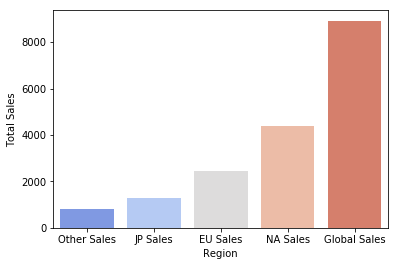

In [3]:
dic = [['NA Sales' , 4392.950000000001], ['EU Sales', 2434.1299999999997], ['JP Sales' , 1291.0200000000002],
       ['Other Sales' , 797.7500000000001], ['Global Sales', 8920.44]]
vgsales_from_dic = pd.DataFrame(data=dic,index = [0,1,2,3,4],columns = ['Region','Total_Sales'])
fig = plt.figure()
axes = sns.barplot(x='Region',y='Total_Sales',data=vgsales_from_dic,palette="coolwarm",order = vgsales_from_dic
                   .set_index('Region')['Total_Sales'].sort_values(ascending=True).reset_index()['Region'].unique())
axes.set_ylabel('Total Sales')

Text(0,0.5,'Global Sales')

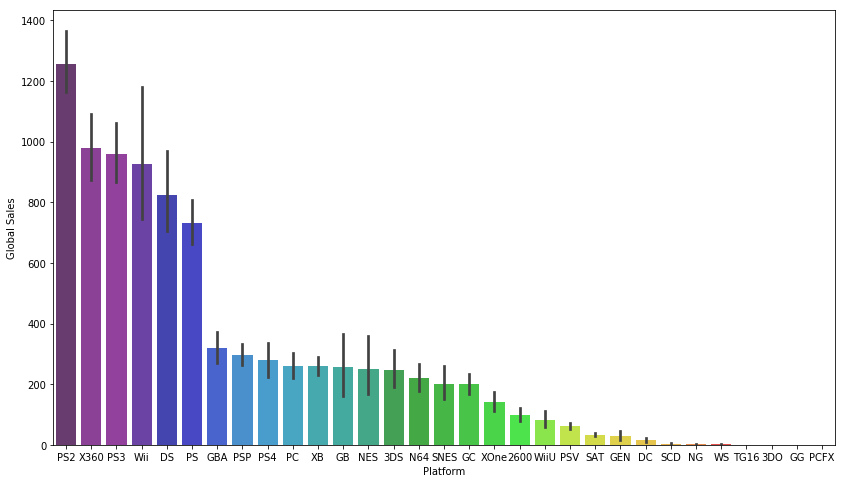

In [4]:
# Global Sales per Console
fig = plt.figure(figsize=(14,8))
ax = sns.barplot(x='Platform',y='Global_Sales',data=vgsales,estimator=np.sum,order = vgsales.groupby('Platform')
                 ['Global_Sales'].sum().sort_values(ascending=False).reset_index()['Platform'].unique(),
                 palette='nipy_spectral',alpha=0.8)
ax.set_ylabel('Global Sales')

Text(0,0.5,'Video Games Count')

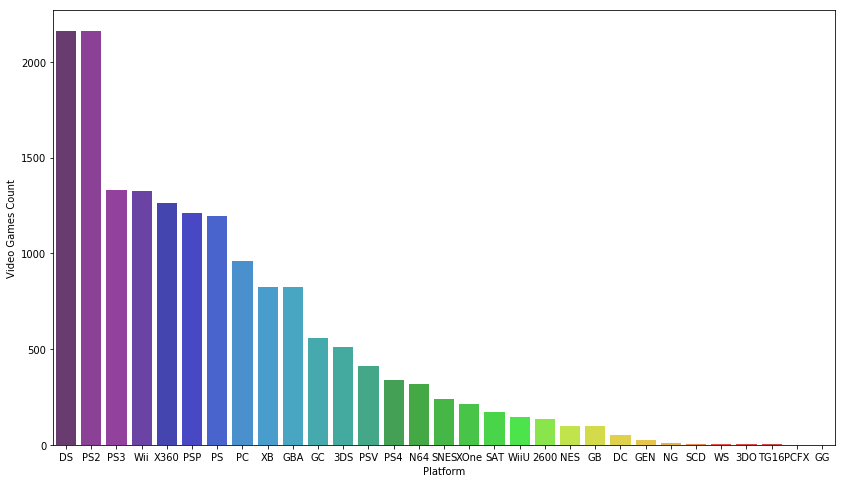

In [5]:
# Games per Console
fig = plt.figure(figsize=(14,8))
ax = sns.countplot(x='Platform',data=vgsales,order = vgsales.groupby('Platform')
                 ['Global_Sales'].count().sort_values(ascending=False).reset_index()['Platform'].unique(),
                 palette='nipy_spectral',alpha=0.8)
ax.set_ylabel('Video Games Count')

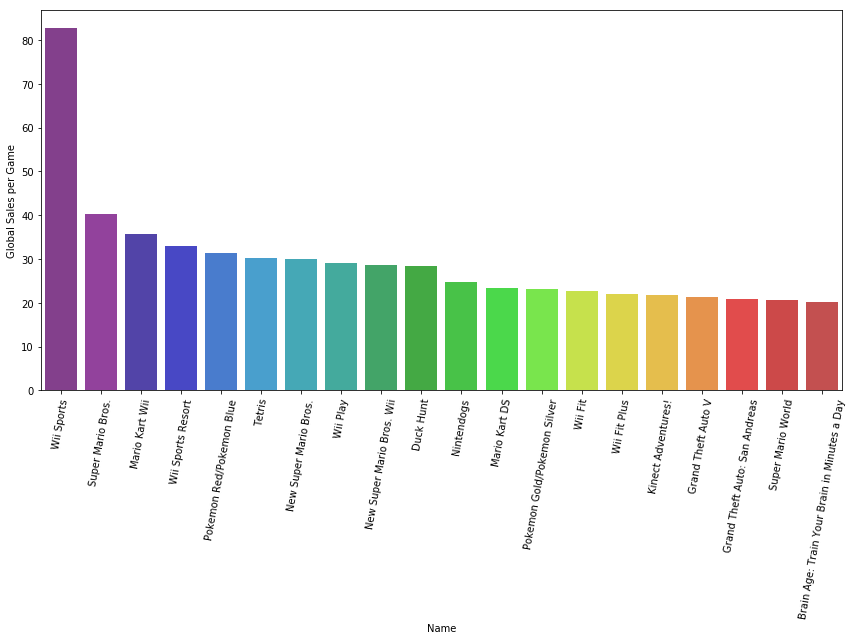

In [6]:
# 20 Best-selling Games of History
vgsales[['Name','Global_Sales']].set_index('Name')

fig = plt.figure(figsize=(12,9))
ax = sns.barplot(x='Name',y='Global_Sales',data=vgsales.head(20),order = vgsales['Name'].head(20).unique(),
                 palette='nipy_spectral',alpha=0.8)
ax.set_ylabel('Global Sales per Game')
plt.xticks(rotation=80)
plt.tight_layout()

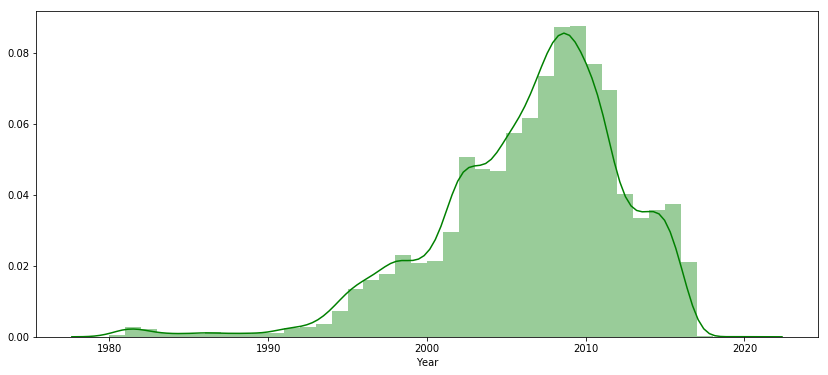

In [7]:
# Games release density on time
plt.figure(figsize=(14,6))
sns.distplot(vgsales.sort_values('Year')['Year'].dropna(),kde=True,bins=40,color='green')

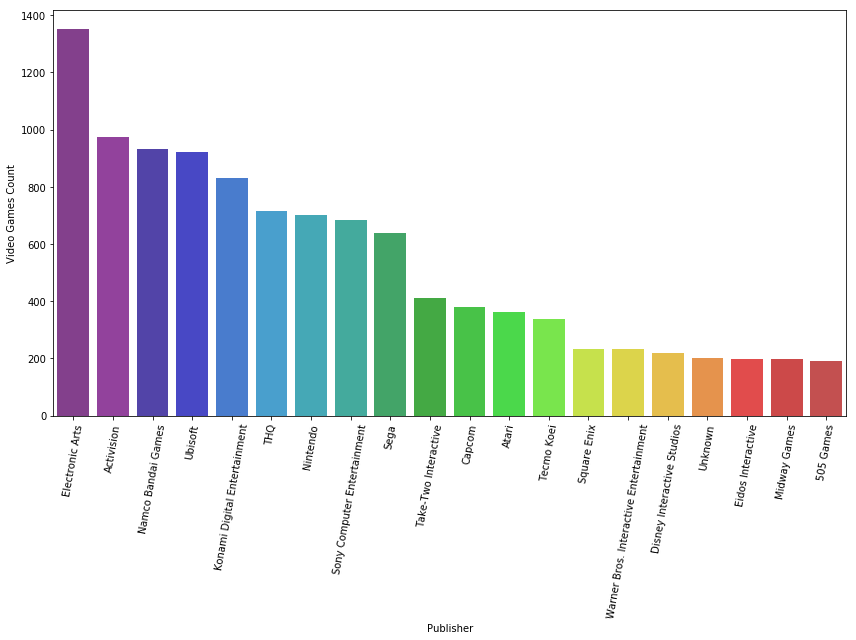

In [10]:
# Titles per Publisher
vgpublisher = vgsales.groupby(vgsales['Publisher']).count()['Global_Sales'].sort_values(ascending = False).reset_index().head(20)
    
fig = plt.figure(figsize=(12,9))
ax = sns.barplot(x='Publisher',y='Global_Sales',data=vgpublisher,order = vgpublisher['Publisher'].unique(),
                 palette='nipy_spectral',alpha=0.8)
ax.set_ylabel('Video Games Count')
plt.xticks(rotation=80)
plt.tight_layout()

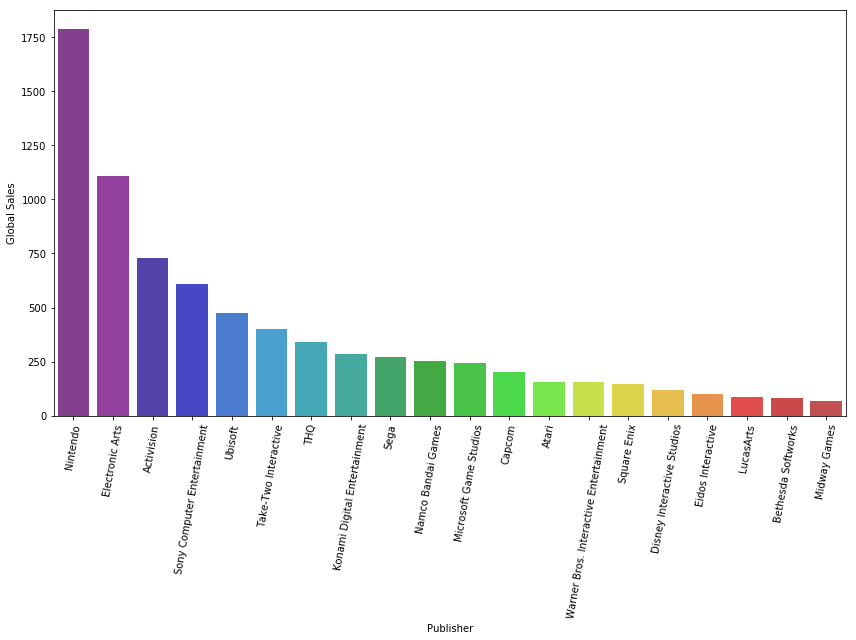

In [11]:
# Sales per Publisher
fig = plt.figure(figsize=(12,9))
ax = sns.barplot(x='Publisher',y='Global_Sales',data=vgsales.groupby(vgsales['Publisher'])['Global_Sales'].sum()
                 .sort_values(ascending = False).head(20).reset_index(),order = vgsales.groupby(vgsales['Publisher'])
                 ['Global_Sales'].sum().sort_values(ascending = False).head(20).reset_index()['Publisher'].unique(),
                 palette='nipy_spectral',alpha=0.8)
ax.set_ylabel('Global Sales')
plt.xticks(rotation=80)
plt.tight_layout()

C:\Users\Bruno\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


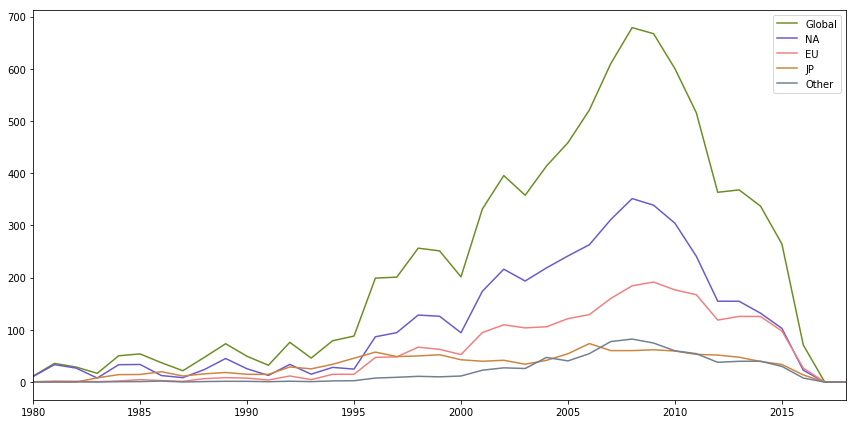

In [30]:
# Sales per Year by Region - graph
fig = plt.figure(figsize=(12,6))
d = {'Global_Sales':'olivedrab','NA_Sales':'slateblue','EU_Sales':'lightcoral','JP_Sales':'peru','Other_Sales':'slategrey'}

for i in ['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']:  # Continue...
    axes = sns.tsplot(data=vgsales.dropna().groupby('Year').sum().reset_index()[i],condition=i.split('_')[0],color=d[i])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1980)))
plt.tight_layout()

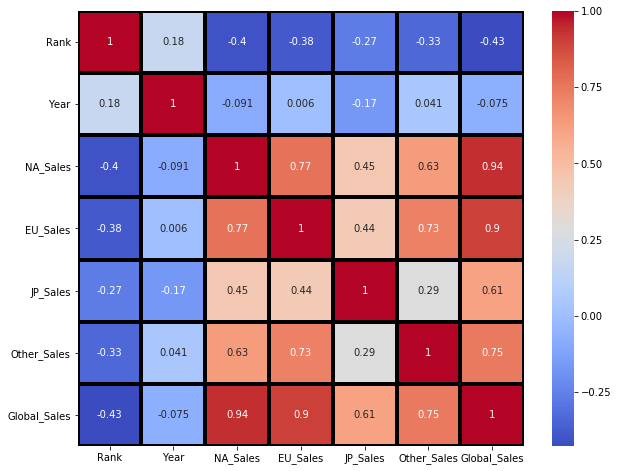

In [13]:
# Correlation Map
plt.figure(figsize=(10,8))
sns.heatmap(vgsales.corr(),cmap='coolwarm',annot=True,linecolor='black',linewidths=3)

# Market and Games Gender Study

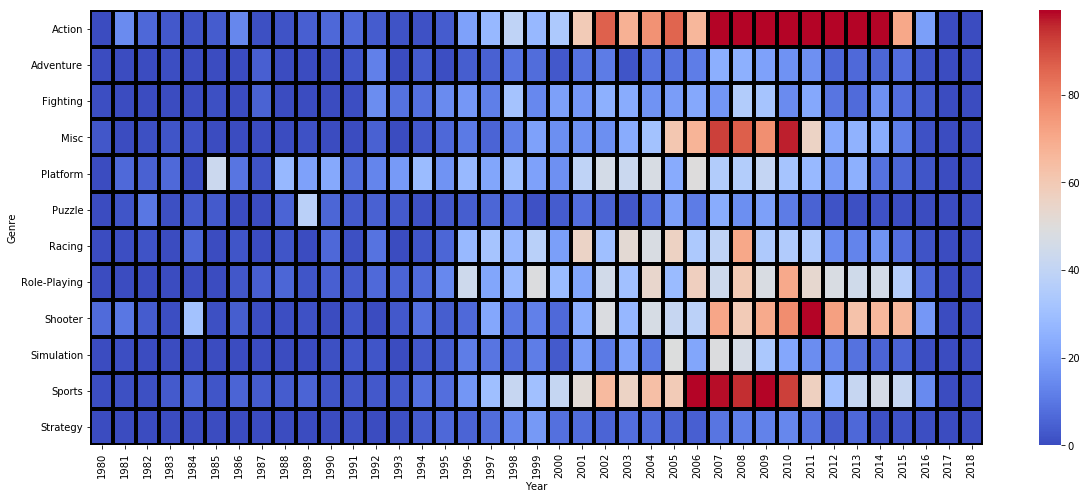

In [21]:
# Sales per Gender
plt.figure(figsize=(20,8))

axes = sns.heatmap(vgsales.pivot_table(index='Genre',columns='Year',values='Global_Sales',aggfunc=np.sum).fillna(0)
                   ,cmap='coolwarm',annot=False,linecolor='black',linewidths=3,robust=True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1980)))

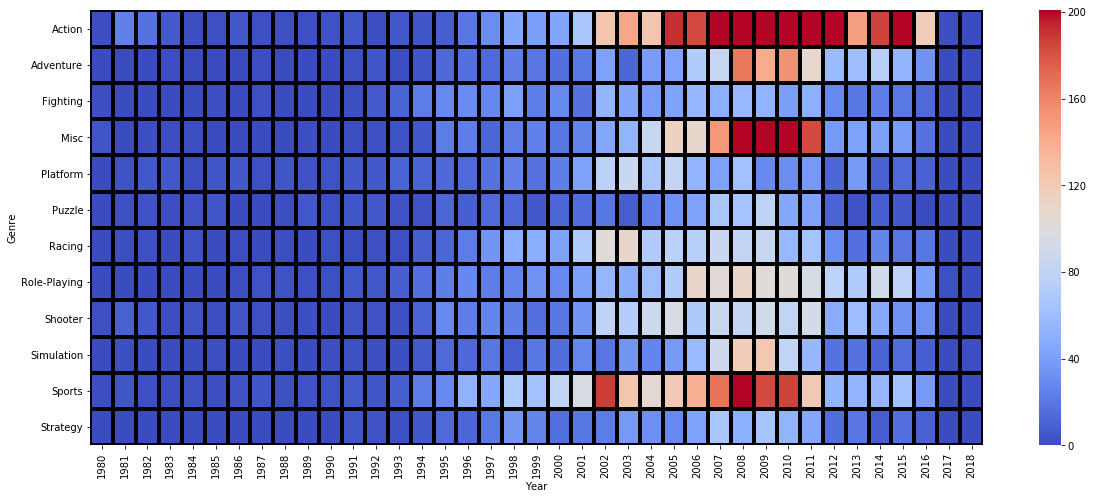

In [22]:
# Publishes per Gender
plt.figure(figsize=(20,8))

axes = sns.heatmap(vgsales.pivot_table(index='Genre',columns='Year',values='Global_Sales',aggfunc=np.count_nonzero).fillna(0)
                   ,cmap='coolwarm',annot=False,linecolor='black',linewidths=3,robust=True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1980)))

### Maps by Region

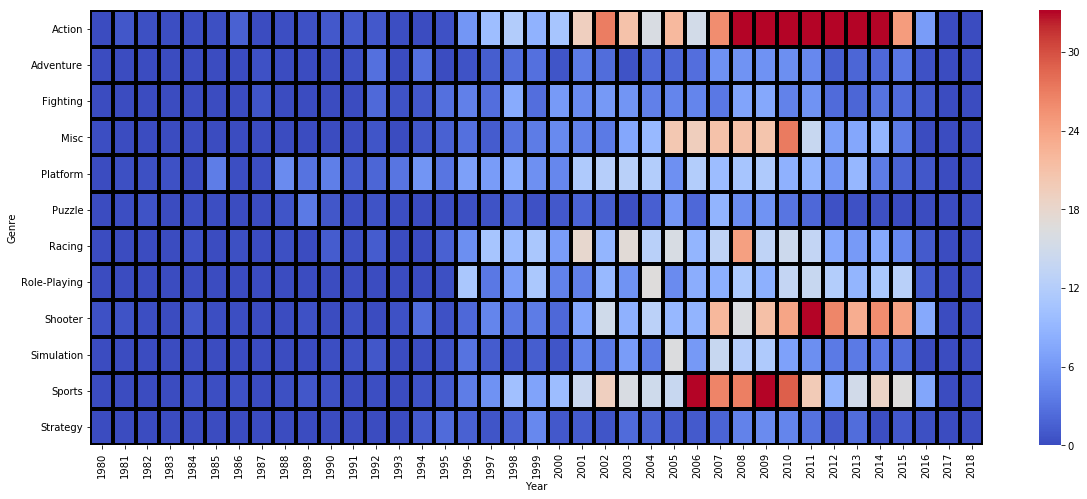

In [20]:
# Sales per Gender - EU
plt.figure(figsize=(20,8))

axes = sns.heatmap(vgsales.pivot_table(index='Genre',columns='Year',values='EU_Sales',aggfunc=np.sum).fillna(0)
                   ,cmap='coolwarm',annot=False,linecolor='black',linewidths=3,robust=True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1980)))

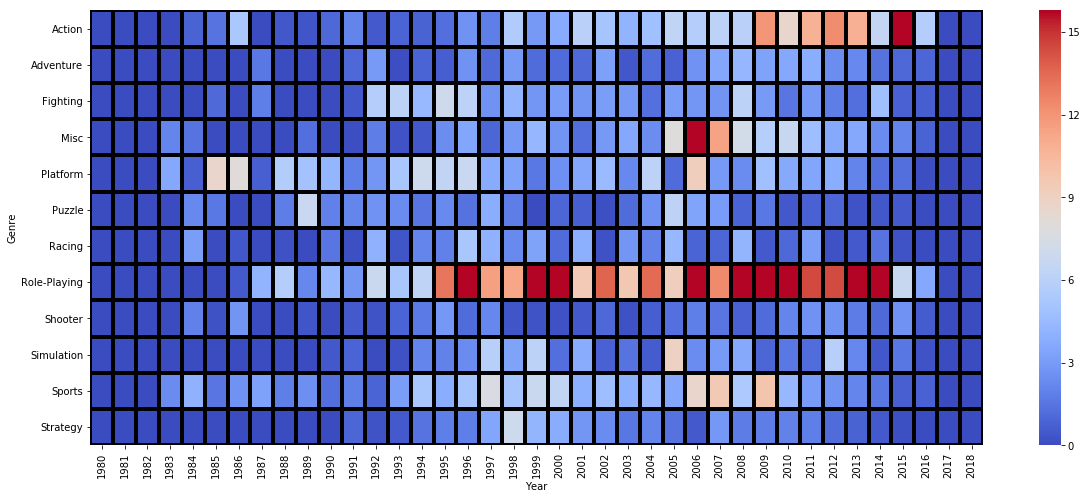

In [23]:
# Sales per Gender - JP
plt.figure(figsize=(20,8))

axes = sns.heatmap(vgsales.pivot_table(index='Genre',columns='Year',values='JP_Sales',aggfunc=np.sum).fillna(0)
                   ,cmap='coolwarm',annot=False,linecolor='black',linewidths=3,robust=True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1980)))

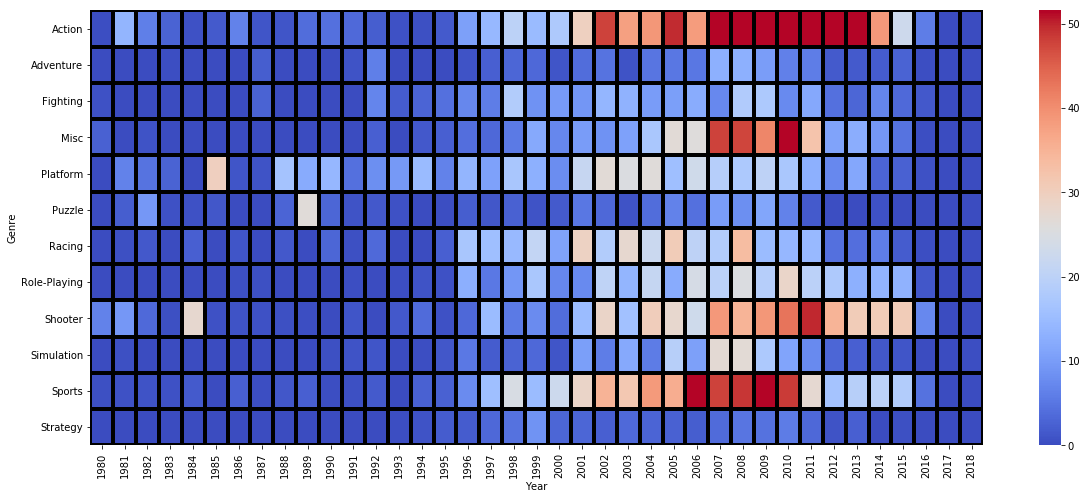

In [24]:
# Sales per Gender - NA
plt.figure(figsize=(20,8))

axes = sns.heatmap(vgsales.pivot_table(index='Genre',columns='Year',values='NA_Sales',aggfunc=np.sum).fillna(0)
                   ,cmap='coolwarm',annot=False,linecolor='black',linewidths=3,robust=True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1980)))

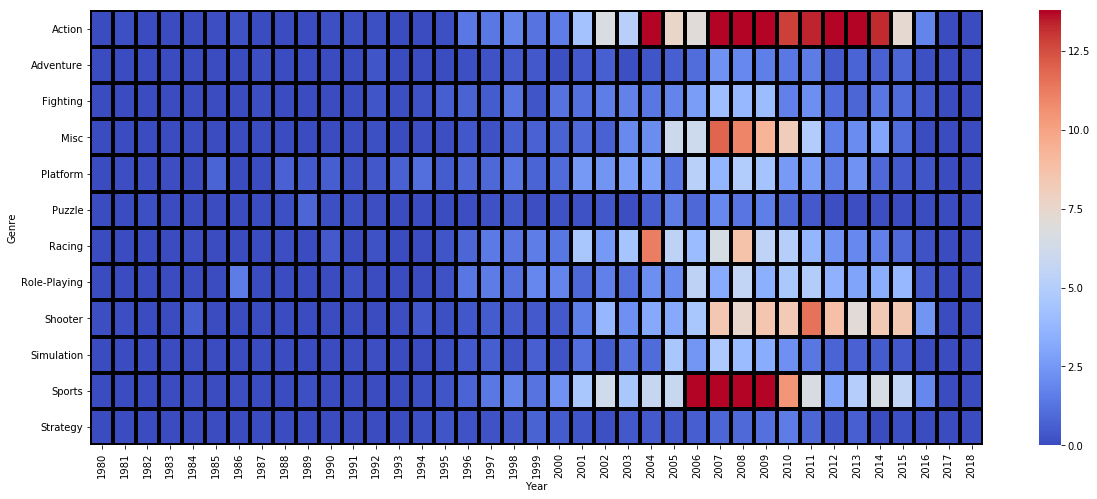

In [25]:
# Sales per Gender - Other
plt.figure(figsize=(20,8))

axes = sns.heatmap(vgsales.pivot_table(index='Genre',columns='Year',values='Other_Sales',aggfunc=np.sum).fillna(0)
                   ,cmap='coolwarm',annot=False,linecolor='black',linewidths=3,robust=True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1980)))

# 2015 Games Scenario

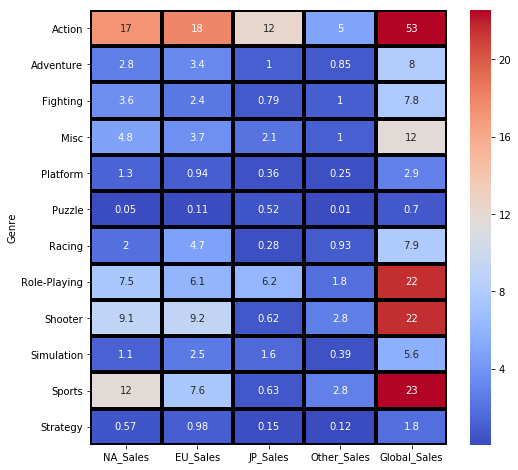

In [31]:
# Considering 2015 as the last year with solid data to compare
# Removing the top 20 from 2012 to view smaller titles and publishers

plt.figure(figsize=(8,8))
axes = sns.heatmap(vgsales[vgsales['Year'] == 2015][20:].groupby('Genre').sum().drop(['Rank','Year'],axis=1),
                   cmap='coolwarm',annot=True,linecolor='black',linewidths=3,robust=True)